<a href="https://colab.research.google.com/github/joshIsac/DeepLearningLab/blob/main/2348523_Multilayer_perceptron_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn

# import dataset


In [32]:
cred_data1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fraudTest.csv")
cred_data1

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [33]:
cred_data1.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [34]:
#take only certain samples
df=cred_data1.sample(450)
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
422792,422792,2020-12-02 04:08:30,6011893664860915,fraud_Kemmer-Buckridge,misc_pos,90.70,Erin,Chavez,F,3379 Williams Common,...,39.5994,-105.0044,320420,Water engineer,1975-07-31,b176c57cc1a60b5876ce087782935b39,1385957310,40.403754,-105.723911,0
442983,442983,2020-12-07 07:00:24,3561212938177173,fraud_Hackett-Lueilwitz,grocery_pos,57.33,Jose,Campbell,M,550 Cunningham Squares,...,32.8224,-85.7704,8269,Minerals surveyor,1977-01-04,17fa14045680ed529994aaaf3fab1c30,1386399624,33.601655,-85.039830,0
369197,369197,2020-11-11 10:31:09,581293083266,fraud_Smith-Stokes,misc_pos,27.55,William,Thomas,M,39227 Mcpherson Shoals,...,36.3850,-98.0727,1078,Podiatrist,1989-10-06,a730208620e8e6e4a314f23dd3df491a,1384165869,36.350538,-98.396158,0
35164,35164,2020-07-03 14:52:51,3590736522064285,fraud_Yost-Rogahn,personal_care,106.34,Kimberly,Gonzalez,F,72966 Shannon Pass Apt. 391,...,34.5091,-92.4828,4074,"Scientist, audiological",1975-12-20,b2bc2feb36d6dea8332ad6eff894b1cc,1372863171,34.945947,-91.698551,0
516786,516786,2020-12-22 20:40:59,374930071163758,fraud_Kilback LLC,food_dining,9.67,Daniel,Escobar,M,61390 Hayes Port,...,42.2203,-83.3583,31515,Police officer,1971-11-05,a4811bf386e6b23cc66e8b972e97c614,1387744859,41.577033,-82.695539,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151133,151133,2020-08-12 21:31:21,30029052116970,"fraud_Gutmann, McLaughlin and Wiza",home,15.42,Curtis,Young,M,4319 Watson Shoals Suite 658,...,42.1239,-79.1895,3833,Metallurgist,1970-10-09,26a8a32f925e45462c7d0e2c094faf8c,1376343081,42.080351,-79.952167,0
14540,14540,2020-06-26 07:44:07,4873783502705038,fraud_Reynolds-Schinner,misc_pos,6.22,Elizabeth,Maxwell,F,194 Goodman Fall Apt. 569,...,48.4786,-122.3345,14871,Public house manager,1974-03-10,ec89864efc6a41896b81aab6ce5f9c56,1372232647,47.991375,-122.478580,0
476149,476149,2020-12-14 12:29:46,4958589671582726883,fraud_Schimmel-Olson,kids_pets,37.43,Aaron,Pena,M,793 Hooper Tunnel Suite 154,...,38.7894,-77.2818,43102,Health visitor,1950-11-27,b2bc25b33c95f8f9383b9d5ae27dcc5c,1387024186,38.233313,-77.400560,0
302491,302491,2020-10-13 09:18:50,30371006069917,"fraud_Greenholt, Jacobi and Gleason",gas_transport,41.70,Robert,James,M,92021 Miranda Meadows,...,38.1380,-89.2231,2135,"Development worker, community",1961-01-31,ee6d49a1b296bf1984a22589a4d6d41e,1381655930,37.184479,-89.156367,0


In [35]:
#shape of the dataset
df.shape

(450, 23)

In [36]:
#checking the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 422792 to 347992
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             450 non-null    int64  
 1   trans_date_trans_time  450 non-null    object 
 2   cc_num                 450 non-null    int64  
 3   merchant               450 non-null    object 
 4   category               450 non-null    object 
 5   amt                    450 non-null    float64
 6   first                  450 non-null    object 
 7   last                   450 non-null    object 
 8   gender                 450 non-null    object 
 9   street                 450 non-null    object 
 10  city                   450 non-null    object 
 11  state                  450 non-null    object 
 12  zip                    450 non-null    int64  
 13  lat                    450 non-null    float64
 14  long                   450 non-null    float64
 15

In [37]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,450.000000,4.500000e+02,450.000000,450.000000,450.000000,450.000000,4.500000e+02,4.500000e+02,450.000000,450.000000,450.000000
mean,267518.495556,3.843230e+17,78.823800,47546.100000,38.224027,-90.039826,7.657569e+04,1.380315e+09,38.260363,-90.028492,0.002222
std,156114.546519,1.262097e+18,183.625109,27037.846816,5.394959,13.886919,2.947638e+05,5.066205e+06,5.418253,13.899432,0.047140
min,921.000000,5.018311e+11,1.170000,1257.000000,20.082700,-165.672300,2.300000e+01,1.371836e+09,20.929067,-165.881161,0.000000
25%,138217.750000,1.800312e+14,11.100000,25442.000000,34.272725,-97.245450,6.815000e+02,1.376008e+09,34.514188,-97.209652,0.000000
50%,254416.000000,3.504065e+15,48.135000,45228.500000,39.047000,-86.889750,2.489500e+03,1.379833e+09,39.170339,-86.913165,0.000000
75%,398083.000000,4.640431e+15,82.645000,71713.250000,42.073400,-80.079050,1.812800e+04,1.385285e+09,42.083846,-80.170792,0.000000
max,555022.000000,4.992346e+18,2352.980000,99783.000000,64.755600,-69.482800,2.906700e+06,1.388519e+09,65.205080,-69.506534,1.000000


In [38]:
#checking if there exist any null values
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [39]:
df.fillna(0)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
422792,422792,2020-12-02 04:08:30,6011893664860915,fraud_Kemmer-Buckridge,misc_pos,90.70,Erin,Chavez,F,3379 Williams Common,...,39.5994,-105.0044,320420,Water engineer,1975-07-31,b176c57cc1a60b5876ce087782935b39,1385957310,40.403754,-105.723911,0
442983,442983,2020-12-07 07:00:24,3561212938177173,fraud_Hackett-Lueilwitz,grocery_pos,57.33,Jose,Campbell,M,550 Cunningham Squares,...,32.8224,-85.7704,8269,Minerals surveyor,1977-01-04,17fa14045680ed529994aaaf3fab1c30,1386399624,33.601655,-85.039830,0
369197,369197,2020-11-11 10:31:09,581293083266,fraud_Smith-Stokes,misc_pos,27.55,William,Thomas,M,39227 Mcpherson Shoals,...,36.3850,-98.0727,1078,Podiatrist,1989-10-06,a730208620e8e6e4a314f23dd3df491a,1384165869,36.350538,-98.396158,0
35164,35164,2020-07-03 14:52:51,3590736522064285,fraud_Yost-Rogahn,personal_care,106.34,Kimberly,Gonzalez,F,72966 Shannon Pass Apt. 391,...,34.5091,-92.4828,4074,"Scientist, audiological",1975-12-20,b2bc2feb36d6dea8332ad6eff894b1cc,1372863171,34.945947,-91.698551,0
516786,516786,2020-12-22 20:40:59,374930071163758,fraud_Kilback LLC,food_dining,9.67,Daniel,Escobar,M,61390 Hayes Port,...,42.2203,-83.3583,31515,Police officer,1971-11-05,a4811bf386e6b23cc66e8b972e97c614,1387744859,41.577033,-82.695539,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151133,151133,2020-08-12 21:31:21,30029052116970,"fraud_Gutmann, McLaughlin and Wiza",home,15.42,Curtis,Young,M,4319 Watson Shoals Suite 658,...,42.1239,-79.1895,3833,Metallurgist,1970-10-09,26a8a32f925e45462c7d0e2c094faf8c,1376343081,42.080351,-79.952167,0
14540,14540,2020-06-26 07:44:07,4873783502705038,fraud_Reynolds-Schinner,misc_pos,6.22,Elizabeth,Maxwell,F,194 Goodman Fall Apt. 569,...,48.4786,-122.3345,14871,Public house manager,1974-03-10,ec89864efc6a41896b81aab6ce5f9c56,1372232647,47.991375,-122.478580,0
476149,476149,2020-12-14 12:29:46,4958589671582726883,fraud_Schimmel-Olson,kids_pets,37.43,Aaron,Pena,M,793 Hooper Tunnel Suite 154,...,38.7894,-77.2818,43102,Health visitor,1950-11-27,b2bc25b33c95f8f9383b9d5ae27dcc5c,1387024186,38.233313,-77.400560,0
302491,302491,2020-10-13 09:18:50,30371006069917,"fraud_Greenholt, Jacobi and Gleason",gas_transport,41.70,Robert,James,M,92021 Miranda Meadows,...,38.1380,-89.2231,2135,"Development worker, community",1961-01-31,ee6d49a1b296bf1984a22589a4d6d41e,1381655930,37.184479,-89.156367,0


In [40]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [41]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [42]:
df['is_fraud'].unique()

array([0, 1])

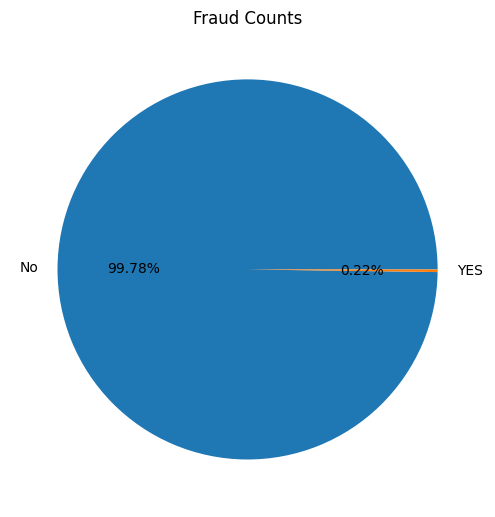

In [43]:
fraud = df["is_fraud"].value_counts()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.pie(fraud, labels=["No", "YES"], autopct="%.2f%%")
plt.title("Fraud Counts")
plt.tight_layout()
plt.show()

In [44]:
from sklearn.utils import resample
cls_0 = df[df["is_fraud"]==0]
cls_1 = df[df['is_fraud']==1]
#Balancing data
cls_0 = resample(cls_0, replace=True, n_samples=len(cls_1))
down_samples = pd.concat([cls_1, cls_0], axis=0)

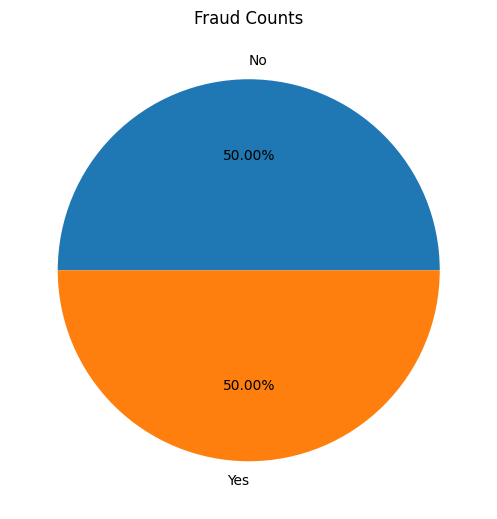

In [45]:
fraud = down_samples['is_fraud'].value_counts()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.pie(fraud, labels=["No", "Yes"], autopct="%.2f%%")
plt.title("Fraud Counts")
plt.tight_layout()
plt.show()

In [46]:
X=df.drop(columns=['is_fraud', 'trans_date_trans_time', 'dob', 'trans_num'])
Y = df['is_fraud']

In [47]:
#X = df.drop(columns=["is_fraud"], inplace = False)
#Y = df["is_fraud"]

In [48]:
X.shape

(450, 19)

In [49]:
Y.shape

(450,)

In [50]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [51]:
from sklearn.model_selection import train_test_split

# Perform train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print the shapes of train and test sets
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)


Train set: (360, 19) (360,)
Test set: (90, 19) (90,)


In [52]:
#implementation of multilayer perceptron
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt

In [53]:
#with 128 input nodes
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [54]:
#with 64 input nodes
model1 = Sequential()
model1.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model1.add(Dense(units=32, activation='relu'))
model1.add(Dense(units=1, activation='sigmoid'))

In [55]:
#Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [56]:
#for 128 input nodes with adam
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
12/12 [==============================] - 1s 19ms/step - loss: 0.4507 - accuracy: 0.9139 - val_loss: 0.2346 - val_accuracy: 0.9889
Epoch 2/10
12/12 [==============================] - 0s 6ms/step - loss: 0.1333 - accuracy: 1.0000 - val_loss: 0.0952 - val_accuracy: 0.9889
Epoch 3/10
12/12 [==============================] - 0s 6ms/step - loss: 0.0407 - accuracy: 1.0000 - val_loss: 0.0636 - val_accuracy: 0.9889
Epoch 4/10
12/12 [==============================] - 0s 5ms/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 0.0580 - val_accuracy: 0.9889
Epoch 5/10
12/12 [==============================] - 0s 5ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.0576 - val_accuracy: 0.9889
Epoch 6/10
12/12 [==============================] - 0s 5ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0583 - val_accuracy: 0.9889
Epoch 7/10
12/12 [==============================] - 0s 4ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0592 - val_accuracy: 0.9889
Epoch 8/10
12/12 [=

In [57]:
model1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
12/12 [==============================] - 1s 15ms/step - loss: 0.3148 - accuracy: 0.9972 - val_loss: 0.2335 - val_accuracy: 0.9889
Epoch 2/10
12/12 [==============================] - 0s 3ms/step - loss: 0.1397 - accuracy: 1.0000 - val_loss: 0.1240 - val_accuracy: 0.9889
Epoch 3/10
12/12 [==============================] - 0s 5ms/step - loss: 0.0647 - accuracy: 1.0000 - val_loss: 0.0794 - val_accuracy: 0.9889
Epoch 4/10
12/12 [==============================] - 0s 4ms/step - loss: 0.0328 - accuracy: 1.0000 - val_loss: 0.0629 - val_accuracy: 0.9889
Epoch 5/10
12/12 [==============================] - 0s 5ms/step - loss: 0.0191 - accuracy: 1.0000 - val_loss: 0.0568 - val_accuracy: 0.9889
Epoch 6/10
12/12 [==============================] - 0s 5ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.0552 - val_accuracy: 0.9889
Epoch 7/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.0549 - val_accuracy: 0.9889
Epoch 8/10
12/12 [=

In [58]:
loss1, accuracy1 = model.evaluate(X_test, y_test)
loss2, accuracy2 = model1.evaluate(X_test, y_test)
print('Model accuracy(128 nodes): ', accuracy1)
print('Model accuracy(64 nodes): ', accuracy2)

3/3 [==============================] - 0s 3ms/step - loss: 0.0578 - accuracy: 0.9889
Model accuracy(128 nodes):  0.9888888597488403
Model accuracy(64 nodes):  0.9888888597488403


In [59]:
from sklearn.metrics import precision_recall_curve, confusion_matrix

In [60]:
pred1 = model.predict(X_test)
precision1, recall1, thresholds1 = precision_recall_curve(y_test, pred1)
pred2 = model1.predict(X_test)
precision2, recall2, thresholds2 = precision_recall_curve(y_test, pred2)

3/3 [==============================] - 0s 3ms/step


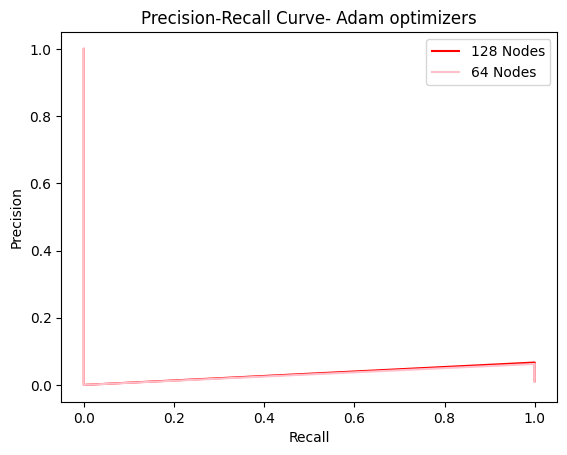

In [61]:

labels = ['64 Nodes', '128 Nodes']
plt.plot(recall1, precision1, color='red', label=labels[1])
plt.plot(recall2, precision2, color='pink', label=labels[0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve- Adam optimizers')
plt.legend()
plt.show()

Precision:

Denotes the proportion of true positives among the predicted positives. In layman's terms, it reflects the accuracy of your model's positive predictions. A high precision signifies that most of the positive predictions made by the model are indeed correct.

Recall:
Represents the proportion of true positives that are correctly identified by the model. In simpler terms, it indicates how well the model captures all the actual positive cases. A high recall implies that the model isn't missing many genuine positive instances.

[[89  0]
 [ 1  0]]


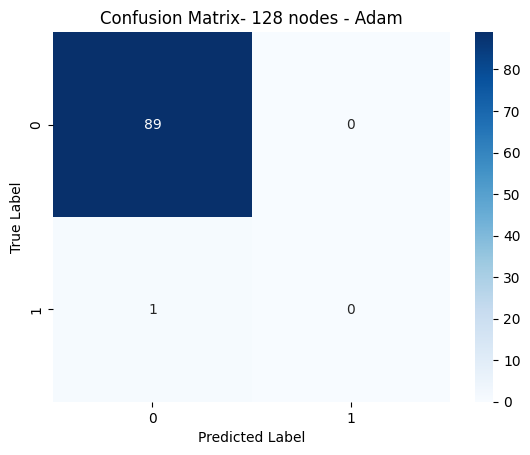

In [62]:
confusion_matrix_result = confusion_matrix(y_test, pred1.round())
print(confusion_matrix_result)
sn.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix- 128 nodes - Adam')
plt.show()

[[89  0]
 [ 1  0]]


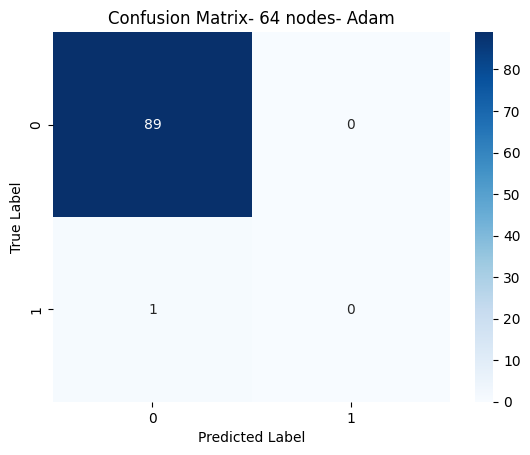

In [63]:
confusion_matrix_result = confusion_matrix(y_test, pred2.round())
print(confusion_matrix_result)
sn.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix- 64 nodes- Adam')
plt.show()

 the model seems to perform well in identifying true positives (fraudulent transactions) but has misclassified one instance as a false negative (non-fraudulent transaction). This indicates that the model's ability to detect fraudulent transactions is good, but there is room for improvement to reduce false negatives.